In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path = './CTU-13_data'

data_file_names = [file for file in os.listdir(data_path)] # Lectura de los nombres de los archivos del directorio
print(data_file_names)  # Lista de strings que contiene el nombre de los archivos .parquet


['1-Neris-20110810.binetflow.parquet', '10-Rbot-20110818.binetflow.parquet', '11-Rbot-20110818-2.binetflow.parquet', '12-NsisAy-20110819.binetflow.parquet', '13-Virut-20110815-3.binetflow.parquet', '2-Neris-20110811.binetflow.parquet', '3-Rbot-20110812.binetflow.parquet', '4-Rbot-20110815.binetflow.parquet', '5-Virut-20110815-2.binetflow.parquet', '6-Menti-20110816.binetflow.parquet', '7-Sogou-20110816-2.binetflow.parquet', '8-Murlo-20110816-3.binetflow.parquet', '9-Neris-20110817.binetflow.parquet']


In [14]:
# Diccionario que contendra los dataframes despues de hacer el cast de parquet a pandas df
data_frames = {}
'''
Iteramos sobre la lista de nombres para añadirlos al diccionario de dataframes

Ejemplo del formato del diccionario seria: 

    {'1-Neris-20110810.binetflow.parquet': pd.DataFrame('./CTU-13_data/1-Neris-20110810.binetflow.parquet')}

'''
for file in data_file_names:
    data_frames[file] = pd.read_parquet(f'{data_path}/{file}') 

In [15]:
# Visualizamos los primeros 5 registros de los datasets
for file in data_file_names:
    print(file)
    print(data_frames.get(f'{file}').head())

1-Neris-20110810.binetflow.parquet
        dur proto    dir state  stos  dtos  tot_pkts  tot_bytes  src_bytes  \
0  1.026539   tcp     ->  S_RA   0.0   0.0         4        276        156   
1  1.009595   tcp     ->  S_RA   0.0   0.0         4        276        156   
2  3.056586   tcp     ->  SR_A   0.0   0.0         3        182        122   
3  3.111769   tcp     ->  SR_A   0.0   0.0         3        182        122   
4  3.083411   tcp     ->  SR_A   0.0   0.0         3        182        122   

                                    label                  Family  
0  flow=Background-Established-cmpgw-CVUT  20110810.binetflow.csv  
1  flow=Background-Established-cmpgw-CVUT  20110810.binetflow.csv  
2             flow=Background-TCP-Attempt  20110810.binetflow.csv  
3             flow=Background-TCP-Attempt  20110810.binetflow.csv  
4             flow=Background-TCP-Attempt  20110810.binetflow.csv  
10-Rbot-20110818.binetflow.parquet
          dur proto    dir    state  stos  dtos  tot_

### Las columnas en los datasets de CTU-13 están relacionadas con el tráfico de red y suelen incluir información sobre conexiones entre IPs, duración, puertos, bytes transferidos, protocolos, etiquetas de botnet, entre otras.

#### - **dur:** Duración de la conexión en segundos.
#### - **proto:** Protocolo de comunicación utilizado (ej. TCP, UDP, ICMP).
#### - **dir:** Dirección del flujo de tráfico (ej. → si es de origen a destino, o ← si es de destino a origen).
#### - **state:** Estado de la conexión (ej. CON para conexiones establecidas, INT para interrumpidas).
#### - **stos / dtos:** Tipo de servicio (ToS) del tráfico enviado y recibido. Son valores que indican la prioridad del paquete en la red.
#### - **tot_pkts:** Número total de paquetes enviados en la conexión.
#### - **tot_bytes:** Número total de bytes transferidos.
#### - **src_bytes:** Cantidad de bytes enviados desde la IP de origen.
#### - **label:** Etiqueta que indica si el tráfico es normal o pertenece a una botnet (tráfico malicioso).
#### - **Family:** Especie de botnet detectada (ej. Neris, Rbot, Virut, Murlo, etc.).

In [16]:
for file in data_file_names:
    print(f"Columnas de {file}:")
    print(data_frames[file].columns)
    print("\n")


Columnas de 1-Neris-20110810.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 10-Rbot-20110818.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 11-Rbot-20110818-2.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 12-NsisAy-20110819.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 13-Virut-20110815-3.binetflow.parquet:
Index(['dur', 'proto', 'dir', 'state', 'stos', 'dtos', 'tot_pkts', 'tot_bytes',
       'src_bytes', 'label', 'Family'],
      dtype='object')


Columnas de 2-Neris-20110811.bine

['flow=Background-Established-cmpgw-CVUT', 'flow=Background-TCP-Attempt', 'flow=Background-TCP-Established', 'flow=Background-Attempt-cmpgw-CVUT', 'flow=To-Background-CVUT-Proxy', ..., 'flow=From-Botnet-V42-UDP-Attempt-DNS', 'flow=From-Botnet-V42-TCP-Established-HTTP-Ad-52', 'flow=From-Botnet-V42-TCP-Established-HTTP-Ad-49', 'flow=From-Botnet-V42-TCP-Established-HTTP-Ad-34', 'flow=Background-CS-Host-CVUT']
Length: 113
Categories (113, object): ['flow=Background', 'flow=Background-Attempt-cmpgw-CVUT', 'flow=Background-CS-Host-CVUT', 'flow=Background-Established-cmpgw-CVUT', ..., 'flow=To-Background-MatLab-Server', 'flow=To-Background-Stribrek', 'flow=To-Background-UDP-CVUT-DNS-Server', 'flow=To-Normal-V42-UDP-NTP-server']


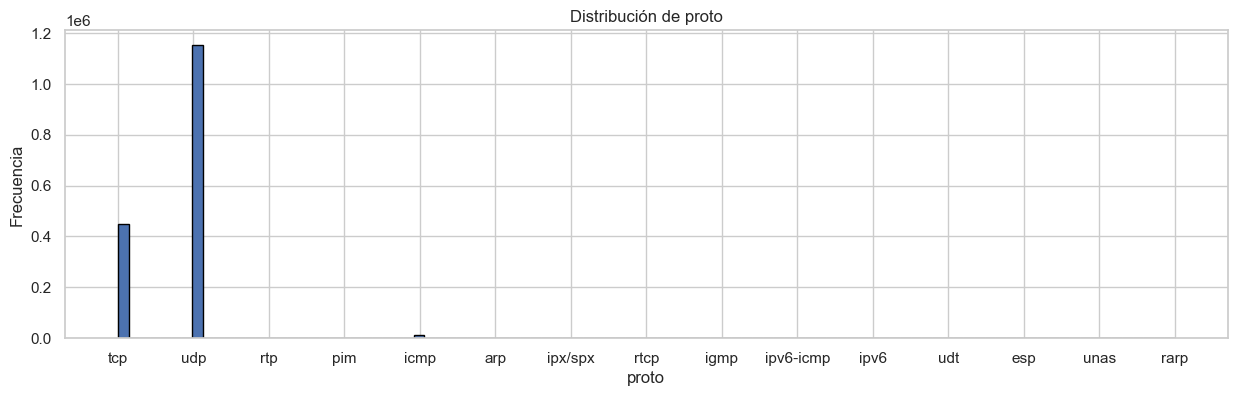

In [21]:

sample_file = data_file_names[0]  # Puedes cambiar el indice para revisar otros archivos
df_sample = data_frames[sample_file]

# Mostrar nombres de columnas y tipos de datos
#print(df_sample.info())

# Mostrar estadisticas generales
#print(df_sample.describe())

column_to_plot = df_sample.columns[1]

dir_col = df_sample['label']

print(dir_col.unique())

plt.figure(figsize=(15,4))
plt.hist(df_sample[column_to_plot], bins=100, edgecolor='black')
plt.xlabel(column_to_plot)
plt.ylabel('Frecuencia')
plt.title(f'Distribución de {column_to_plot}')
plt.show()


# Trafico de red normal

In [ ]:
normal_traffic_data = pd.read_csv('./CTU_13_Normal_Traffic_data/CTU13_Normal_Traffic.csv')
normal_traffic_data.head()
#print(normal_traffic_data.columns)
#print(len(normal_traffic_data.columns))

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,891,0,2,0,348,0,0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1,20835,0,2,0,266,0,0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
2,2,545,0,2,0,442,0,0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
3,3,83892,0,2,0,194,0,0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
4,4,608,0,2,0,480,0,0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
normal_traffic_data.describe()

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,53314.000000,5.331400e+04,53314.000000,53314.000000,5.331400e+04,5.331400e+04,53314.000000,53314.000000,53314.000000,53314.000000,...,53314.000000,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,53314.0
mean,26658.075571,1.183955e+07,8.998049,15.738624,5.184460e+03,1.175429e+04,88.015512,1.682954,18.315041,29.274102,...,5.365908,1.568118e+05,9.385848e+04,3.289065e+05,1.031014e+05,3.841496e+06,6.106216e+05,4.346262e+06,3.350085e+06,0.0
std,15391.137943,3.065518e+07,191.328376,233.664390,2.391167e+05,2.514014e+05,243.945402,12.427593,60.287267,82.711110,...,181.658470,1.003680e+06,6.088809e+05,1.630029e+06,8.872057e+05,1.274905e+07,4.317842e+06,1.428394e+07,1.204194e+07,0.0
min,0.000000,1.300000e+01,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,13329.250000,2.432650e+04,0.000000,2.000000,0.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,26658.500000,4.228100e+04,0.000000,2.000000,0.000000e+00,1.480000e+02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,39986.750000,3.724082e+05,2.000000,2.000000,3.100000e+01,2.550000e+02,30.000000,0.000000,10.333333,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,53315.000000,1.199996e+08,13707.000000,21933.000000,1.645956e+07,3.098852e+07,1460.000000,1460.000000,1460.000000,824.456184,...,13707.000000,1.000729e+08,3.102333e+07,1.000729e+08,1.000729e+08,1.197688e+08,6.344806e+07,1.197688e+08,1.197688e+08,0.0


# Trafico de red inusual

In [ ]:
attack_traffic_data = pd.read_csv('./CTU_13_Attack_Traffic_data/CTU13_Attack_Traffic.csv')
attack_traffic_data.head()
#print(len(attack_traffic_data.columns))

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,59086131,7,1,0,0,0,0,0.000000,0.000000,...,0,2987276.0,0.0,2987276,2987276,1.869962e+07,19471121.45,41116855,5999291,1
1,1,12452268,37,1,2408,68,68,50,65.081081,6.726310,...,37,0.0,0.0,0,0,0.000000e+00,0.00,0,0,1
2,2,118741070,5,4,170,682,45,22,34.000000,10.440307,...,5,2276383.0,0.0,2276383,2276383,1.161281e+08,0.00,116128125,116128125,1
3,3,180643,25,11,180,25790,90,0,7.200000,24.919872,...,2,0.0,0.0,0,0,0.000000e+00,0.00,0,0,1
4,4,440,4,1,0,0,0,0,0.000000,0.000000,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,1


In [ ]:
#attack_traffic_data.describe()
attack_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38898 entries, 0 to 38897
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         38898 non-null  int64  
 1   Flow Duration      38898 non-null  int64  
 2   Tot Fwd Pkts       38898 non-null  int64  
 3   Tot Bwd Pkts       38898 non-null  int64  
 4   TotLen Fwd Pkts    38898 non-null  int64  
 5   TotLen Bwd Pkts    38898 non-null  int64  
 6   Fwd Pkt Len Max    38898 non-null  int64  
 7   Fwd Pkt Len Min    38898 non-null  int64  
 8   Fwd Pkt Len Mean   38898 non-null  float64
 9   Fwd Pkt Len Std    38898 non-null  float64
 10  Bwd Pkt Len Max    38898 non-null  int64  
 11  Bwd Pkt Len Min    38898 non-null  int64  
 12  Bwd Pkt Len Mean   38898 non-null  float64
 13  Bwd Pkt Len Std    38898 non-null  float64
 14  Flow Byts/s        38898 non-null  float64
 15  Flow Pkts/s        38898 non-null  float64
 16  Flow IAT Mean      388

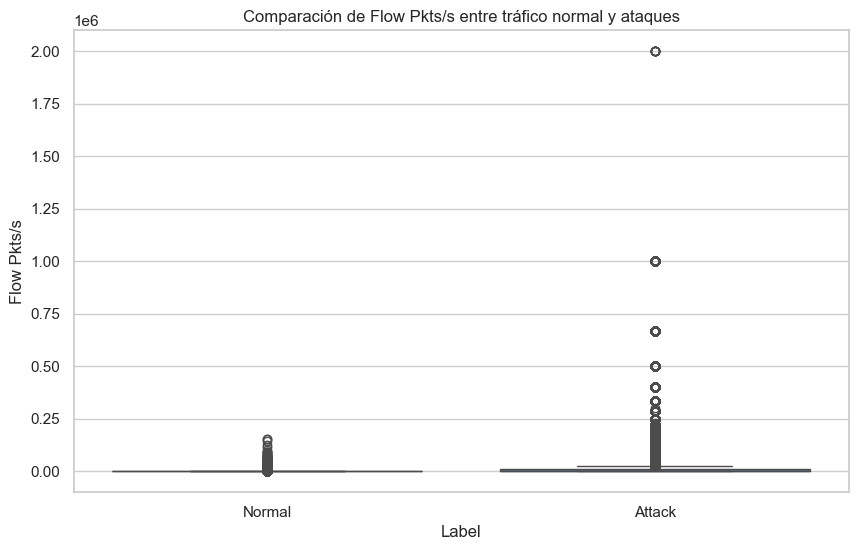

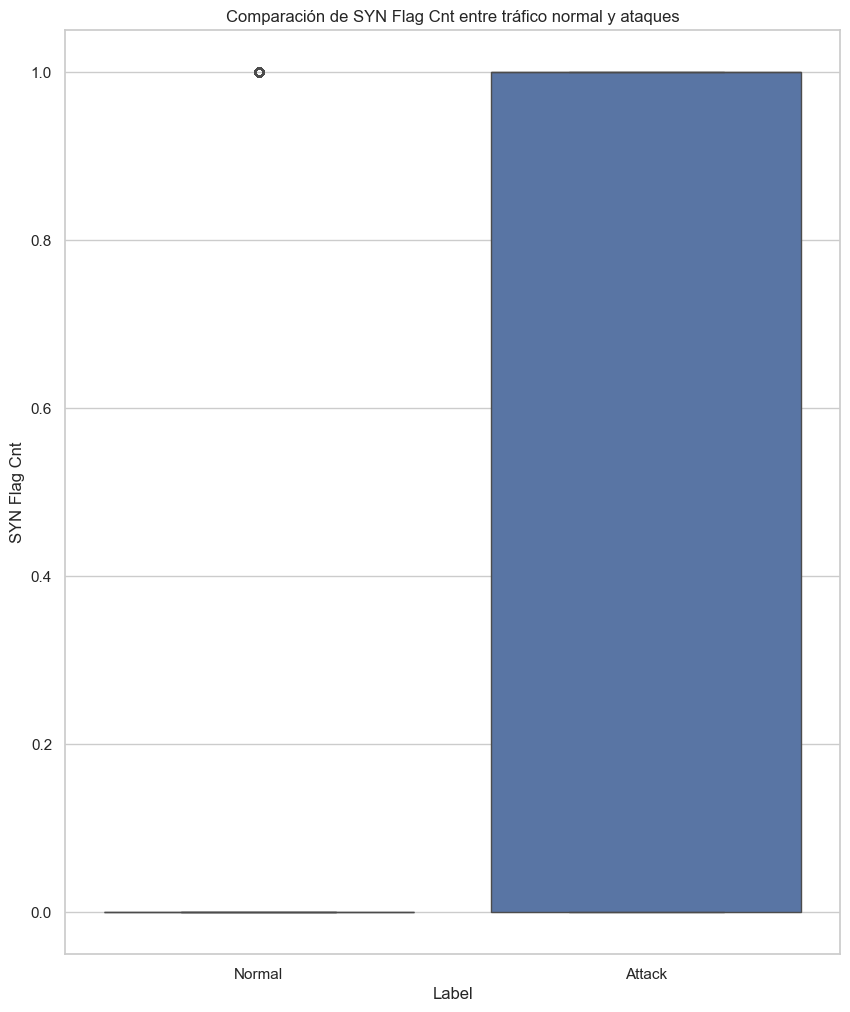

In [ ]:
sns.set(style="whitegrid")
# Unir ambos datasets y agregar etiquetas
normal_traffic_data["Label"] = "Normal"
attack_traffic_data["Label"] = "Attack"
df = pd.concat([normal_traffic_data, attack_traffic_data])

# Gráfico 1: Comparación de Flow Pkts/s
plt.figure(figsize=(10, 6))
sns.boxplot(x="Label", y="Flow Pkts/s", data=df)
plt.title("Comparación de Flow Pkts/s entre tráfico normal y ataques")
plt.show()

# Gráfico 2: Comparación de SYN Flag Cnt
plt.figure(figsize=(10, 12))
sns.boxplot(x="Label", y="SYN Flag Cnt", data=df)
plt.title("Comparación de SYN Flag Cnt entre tráfico normal y ataques")
plt.show()

# **Preprocesamiento de los datos**
---
### Se fusionaran todos los archivos con extension .pcap del conjunto de datos CTU-13:


In [ ]:

data_path = './CTU-13_data'

data_file_names = [file for file in os.listdir(data_path)] # Lectura de los nombres de los archivos del directorio
print(data_file_names)  # Lista de strings que contiene el nombre de los archivos .parquet

for file in filenames:
    if file not in test_file:
        path = os.path.join(pathdir, file)
        train_files.append(file)
        dfs.append(pd.read_csv(path))
all_data = pd.concat(dfs)  # Concat all to a single df